In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
%matplotlib inline

In [8]:
wine=pd.read_csv('QualityPrediction.csv')

In [9]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


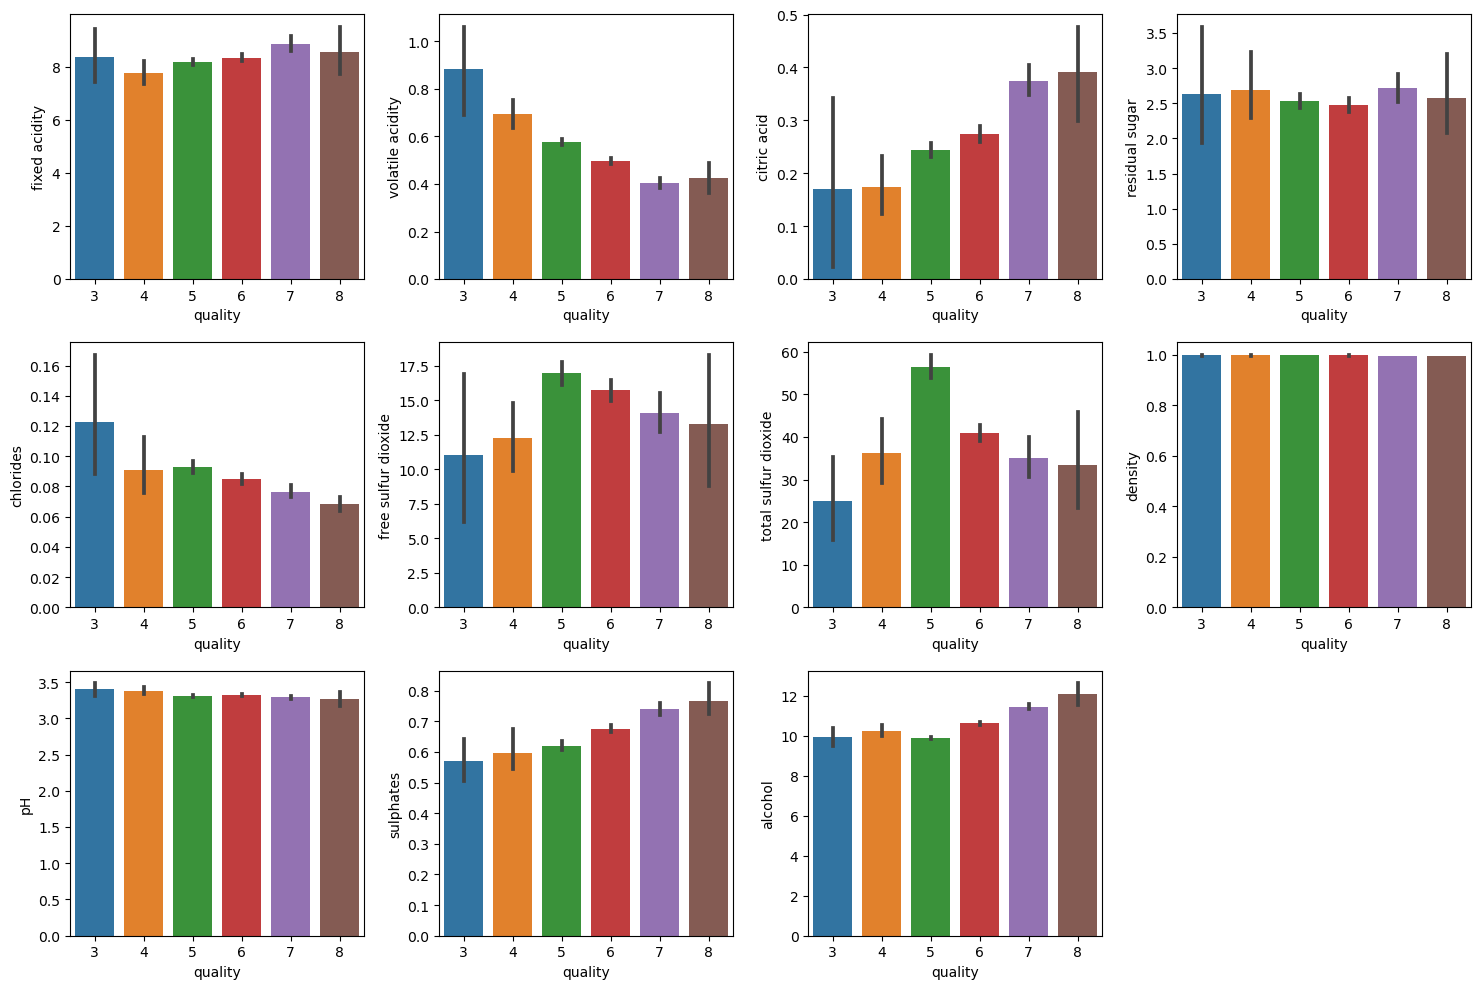

In [7]:
fig = plt.figure(figsize=(15,10))
plt.subplot(3,4,1)
sns.barplot(x='quality',y='fixed acidity',data=wine)
plt.subplot(3,4,2)
sns.barplot(x='quality',y='volatile acidity',data=wine)
plt.subplot(3,4,3)
sns.barplot(x='quality',y='citric acid',data=wine)
plt.subplot(3,4,4)
sns.barplot(x='quality',y='residual sugar',data=wine)
plt.subplot(3,4,5)
sns.barplot(x='quality',y='chlorides',data=wine)
plt.subplot(3,4,6)
sns.barplot(x='quality',y='free sulfur dioxide',data=wine)
plt.subplot(3,4,7)
sns.barplot(x='quality',y='total sulfur dioxide',data=wine)
plt.subplot(3,4,8)
sns.barplot(x='quality',y='density',data=wine)
plt.subplot(3,4,9)
sns.barplot(x='quality',y='pH',data=wine)
plt.subplot(3,4,10)
sns.barplot(x='quality',y='sulphates',data=wine)
plt.subplot(3,4,11)
sns.barplot(x='quality',y='alcohol',data=wine)
plt.tight_layout()

In [8]:
wine['quality'].value_counts()


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [9]:
ranges = (2,6.5,8) 
groups = ['bad','good']
wine['quality'] = pd.cut(wine['quality'],bins=ranges,labels=groups)

In [18]:
le = LabelEncoder()
wine['quality'] = le.fit_transform(wine['quality'])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [19]:
wine['quality'].value_counts()


0    1382
1     217
Name: quality, dtype: int64

In [20]:
good_quality = wine[wine['quality']==1]
bad_quality = wine[wine['quality']==0]
bad_quality = bad_quality.sample(frac=1)
bad_quality = bad_quality[:217]
new_df = pd.concat([good_quality,bad_quality])
new_df = new_df.sample(frac=1)
new_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1111,5.4,0.42,0.27,2.0,0.092,23.0,55.0,0.99471,3.78,0.64,12.3,1
622,10.0,0.58,0.22,1.9,0.080,9.0,32.0,0.99740,3.13,0.55,9.5,0
1147,10.0,0.41,0.45,6.2,0.071,6.0,14.0,0.99702,3.21,0.49,11.8,1
1016,8.9,0.38,0.40,2.2,0.068,12.0,28.0,0.99486,3.27,0.75,12.6,1
1332,8.4,0.39,0.10,1.7,0.075,6.0,25.0,0.99581,3.09,0.43,9.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1257,7.0,0.58,0.28,4.8,0.085,12.0,69.0,0.99633,3.32,0.70,11.0,0
334,7.9,0.65,0.01,2.5,0.078,17.0,38.0,0.99630,3.34,0.74,11.7,1
1107,9.1,0.30,0.41,2.0,0.068,10.0,24.0,0.99523,3.27,0.85,11.7,1
458,10.4,0.33,0.63,2.8,0.084,5.0,22.0,0.99980,3.26,0.74,11.2,1


In [22]:
new_df['quality'].value_counts()


1    217
0    217
Name: quality, dtype: int64

In [23]:

from sklearn.model_selection import train_test_split
X = new_df.drop('quality',axis=1) 
y = new_df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [24]:
param = {'n_estimators':[100,200,300,400,500,600,700,800,900,1000]}
grid_rf = GridSearchCV(RandomForestClassifier(),param,scoring='accuracy',cv=10,)
grid_rf.fit(X_train, y_train)
print('Best parameters --> ', grid_rf.best_params_)
# Wine Quality Prediction
pred = grid_rf.predict(X_test)
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))

Best parameters -->  {'n_estimators': 800}
[[56 11]
 [ 7 57]]


              precision    recall  f1-score   support

           0       0.89      0.84      0.86        67
           1       0.84      0.89      0.86        64

    accuracy                           0.86       131
   macro avg       0.86      0.86      0.86       131
weighted avg       0.86      0.86      0.86       131



0.8625954198473282


In [25]:
##steps used 
#Step 1 – Importing libraries required for Wine Quality Prediction.
#Step 2 – Read input data.
#Step 3 – Describe the data.
#Step 4 – Take info from the data.
#Step 5 – Plot out the data.
#Step 6 – Count the no. of instances of each class.
#Step 7 – Make just 2 categories good and bad.
#Step 8 – Alloting 0 to bad and 1 to good.
#Step 9 – Again check counts.
#Step 10 – Balancing the two classes.
#Step 11 – Again check the counts of classes in the new dataframe.
#Step 12 – Checking the correlation between columns.
#Step 13 – Splitting the data into train and test.
#Step 14 – Finally training our Wine Quality Prediction model.


SyntaxError: invalid character '–' (U+2013) (3119413083.py, line 2)